<a href="https://colab.research.google.com/github/Stanleynjoroge/spatial_deep_learning/blob/main/Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds


(train_ds, test_ds), info = tfds.load('cifar10', split=['train', 'test'], with_info=True, as_supervised=True)


def preprocess_image(image, label):
    image = tf.image.resize(image, (48, 48))  # Resize images to 48x48
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)


batch_size = 64


train_ds = train_ds.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_ds, epochs=20, validation_data=test_ds)


test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)


model.save('cifar10_model.h5')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.AF1D93_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.AF1D93_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/20
782/782 [==============================] - 194s 245ms/step - loss: 1.5091 - accuracy: 0.4525 - val_loss: 1.2438 - val_accuracy: 0.5557
Epoch 2/20
782/782 [==============================] - 187s 238ms/step - loss: 1.1451 - accuracy: 0.5947 - val_loss: 1.0860 - val_accuracy: 0.6219
Epoch 3/20
782/782 [==============================] - 191s 243ms/step - loss: 0.9667 - accuracy: 0.6641 - val_loss: 0.9458 - val_accuracy: 0.6706
Epoch 4/20
782/782 [==============================] - 187s 239ms/step - loss: 0.8400 - accuracy: 0.7079 - val_loss: 0.9142 - val_accuracy: 0.6825
Epoch 5/20
782/782 [==============================] - 189s 241ms/step - loss: 0.7346 - accuracy: 0.7449 - val_loss: 0.8600 - val_accuracy: 0.7031
Epoch 6/20
782/782 [==============================] - 194s 247ms/step - loss: 0.6515 - accuracy: 0.7728 - val_loss: 0.8455 - val_accuracy: 0.7220
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
model.save('cifar10_model.h5')

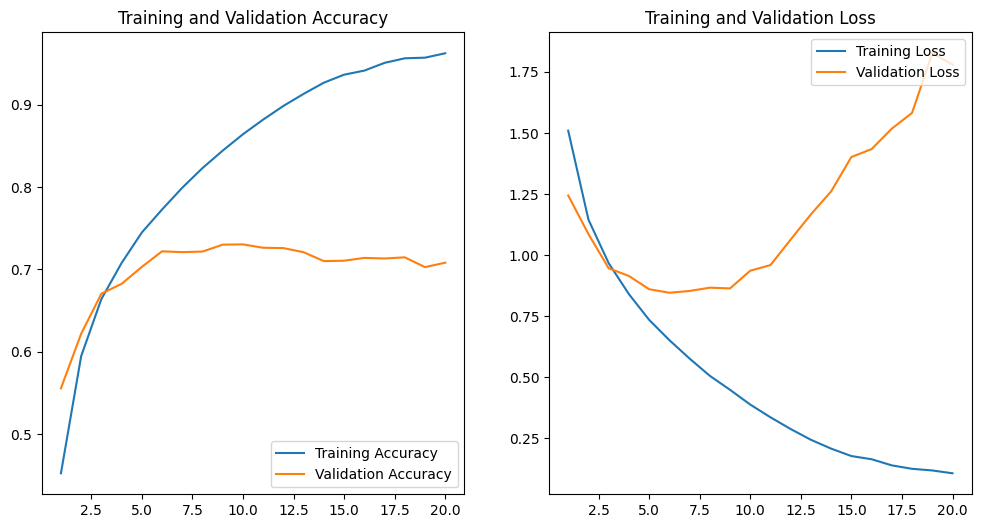

In [3]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


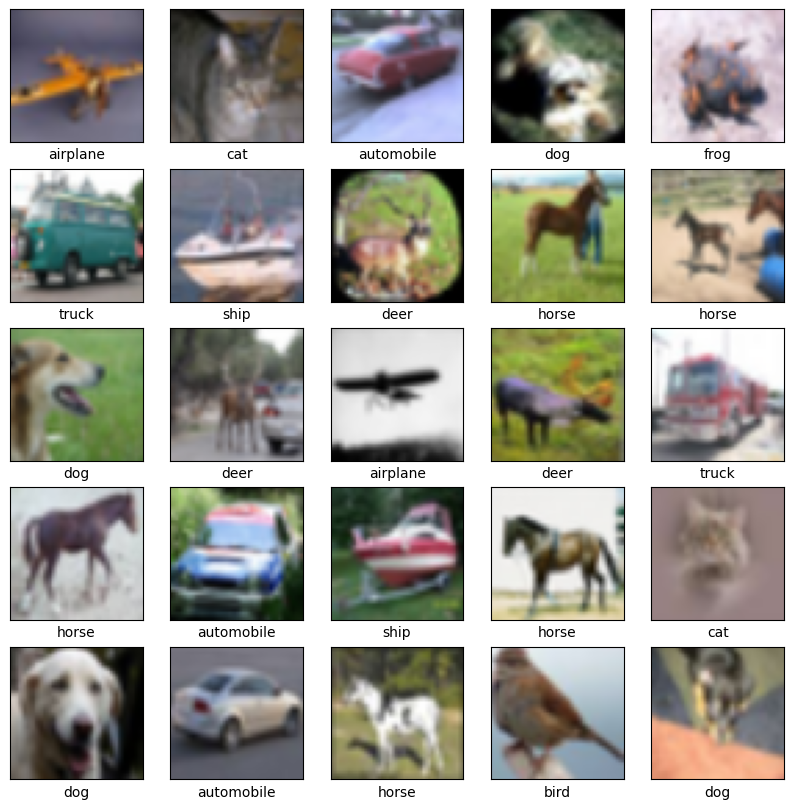

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_ds, test_ds), info = tfds.load('cifar10', split=['train', 'test'], with_info=True, as_supervised=True)

def preprocess_image(image, label):
    image = tf.image.resize(image, (48, 48))  # Resize images to 48x48
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

batch_size = 64
train_ds = train_ds.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Function to plot images in a grid
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):  # Plot 25 images
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Get the class names
class_names = info.features['label'].names

# Take a batch of images from the training dataset
for image_batch, label_batch in train_ds.take(1):
    image_batch = image_batch.numpy()
    label_batch = label_batch.numpy()

# Plot the images
plot_images(image_batch, label_batch, class_names)